In [26]:
import csv, math, re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [21]:
typeCounts = defaultdict(int)
data = []
with open('mbti_1.csv', encoding="utf8") as f:
    reader = csv.reader(f)
    counter = 0
    averageLength = 0
    for row in reader:
        if counter == 0:
            counter = 1
            continue
        (type, text) = row
        data.append([type, text.split("|||")])
        averageLength += len(text.split()) / 8676
        counter += 1
        typeCounts[type] += 1
print(counter, averageLength)

8676 1226.1001613646831


In [29]:
test = data[0][1]
print(test)

["'http://www.youtube.com/watch?v=qsXHcwe3krw", 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg', 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks', 'What has been the most life-changing experience in your life?', 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.', 'May the PerC Experience immerse you.', 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206', "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...", '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-desig

In [35]:
# Replace links with $link$
# https://stackoverflow.com/questions/3809401/what-is-a-good-regular-expression-to-match-a-url
link_expr = r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"

no_links = [[type, [re.sub(expression, "$link$", string) for string in text]] for [type, text] in data]

In [36]:
# replace MBTI
# https://stackoverflow.com/questions/16720541/python-string-replace-regular-expression/16720705
mbti_pat = r"ISFJ|ESFP|ISFP|ISTP|ENFP|ENFJ|INFJ|ESTP|ESFJ|ESTJ|ENTP|INFP|INTP|INTJ|ISTJ|ENTJ"
mbti_regex = re.compile(r"ISFJ|ESFP|ISFP|ISTP|ENFP|ENFJ|INFJ|ESTP|ESFJ|ESTJ|ENTP|INFP|INTP|INTJ|ISTJ|ENTJ", re.IGNORECASE)
MBTI_REP = '$MBTI$'

# replace hashtags
processed = [[type, [mbti_regex.sub(MBTI_REP, string) for string in text]] for [type, text] in data]

In [37]:
processed[0]

['INFJ',
 ["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  '$MBTI$ and $MBTI$ moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my $MBTI$ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello $MBTI$7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-conten

([<matplotlib.axis.YTick at 0x2729e157a20>,
 <a list of 16 Text yticklabel objects>)

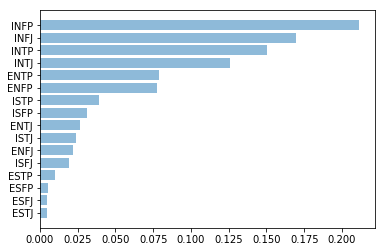

In [25]:
typeCounts = {key:typeCounts[key] /8676 for key in typeCounts}
sortedTypes = sorted(((type, typeCounts[type]) for type in typeCounts), key=lambda type: typeCounts[type[0]])
objects = [e[0] for e in sortedTypes]
y_pos = np.arange(len(objects))
freq = [e[1] for e in sortedTypes]
 
plt.barh(y_pos, freq, align='center', alpha=0.5)
plt.yticks(y_pos, objects)